# Data set we contains

1. age - age
2. bp - blood pressure
3. sg - specific gravity
4. al - albumin
5. su - sugar
6. rbc - red blood cells
7. pc - pus cell
8. pcc - pus cell clumps
9. ba - bacteria
10. bgr - blood glucose random
11. bu - blood urea
12. sc - serum creatinine
13. sod - sodium
14. pot - potassium
15. hemo - haemoglobin
16. pcv - packed cell volume
17. wc - white blood cell count
18. rc - red blood cell count
19. htn - hypertension
20. dm - diabetes mellitus
21. cad - coronary artery disease
22. appet - appetite
23. pe - pedal edema
24. ane - anemia
25. lassification - class

# Feature description of the Data

1. Age(numerical) --> age in years
2. Blood Pressure(numerical) bp in mm/Hg
3. Specific Gravity(nominal) sg - (1.005,1.010,1.015,1.020,1.025)
4. Albumin(nominal)al - (0,1,2,3,4,5)
5. Sugar(nominal) su - (0,1,2,3,4,5)
6. Red Blood Cells(nominal) rbc - (normal,abnormal)
7. Pus Cell (nominal)pc - (normal,abnormal)
8. Pus Cell clumps(nominal)pcc - (present,notpresent)
9. Bacteria(nominal) ba - (present,notpresent)
10. Blood Glucose Random(numerical) bgr in mgs/dl
11. Blood Urea(numerical) bu in mgs/dl
12. Serum Creatinine(numerical) sc in mgs/dl
13. Sodium(numerical) sod in mEq/L
14. Potassium(numerical) pot in mEq/L
15. Haemoglobin(numerical) hemo in gms
16. Packed Cell Volume(numerical)
17. White Blood Cell Count(numerical) wc in cells/cumm
18. Red Blood Cell Count(numerical) rc in millions/cmm
19. Hypertension(nominal) htn - (yes,no)
20. Diabetes Mellitus(nominal) dm - (yes,no)
21. Coronary Artery Disease(nominal) cad - (yes,no)
22. Appetite(nominal) ppet - (good,poor)
23. Pedal Edema(nominal) pe - (yes,no)
24. Anemia(nominal)ane - (yes,no)
25. Class (nominal) class - (ckd,notckd)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# For Filtering the warnings
import warnings
warnings.filterwarnings('ignore')

## Install & Importing the Dependencies

## Extract the Data-Set ( Kidney_Disease.csv )


In [ ]:
kidney=pd.read_csv('/content/drive/MyDrive/machine learning project Chronic Kidney Disease/kidney_disease.csv')

In [ ]:
kidney.shape

(400, 26)

In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
kidney.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


# Performing Exploitory Data Analysis ( EDA )
- Modifying the Column Names as per our requirements

In [ ]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:

# Read the updated data_description.txt using pipe '|' as separator
columns = pd.read_csv("/content/drive/MyDrive/machine learning project Chronic Kidney Disease/data_description12.txt", sep='|', header=None)

# Reset the index to ensure the DataFrame is properly indexed
columns = columns.reset_index(drop=True)

# Rename the columns to 'cols' for the descriptions and 'abb_col_names' for the abbreviated names
columns.columns = ['cols', 'abb_col_names']

# Display the DataFrame
print(columns)


              cols            abb_col_names
0               id                       id
1              age                      age
2               bp           blood pressure
3               sg         specific gravity
4               al                  albumin
5               su                    sugar
6              rbc          red blood cells
7               pc                 pus cell
8              pcc          pus cell clumps
9               ba                 bacteria
10             bgr     blood glucose random
11              bu               blood urea
12              sc         serum creatinine
13             sod                   sodium
14             pot                potassium
15            hemo              haemoglobin
16             pcv       packed cell volume
17              wc   white blood cell count
18              rc     red blood cell count
19             htn             hypertension
20              dm        diabetes mellitus
21             cad  coronary art

In [ ]:
kidney.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.columns=columns['abb_col_names'].values

In [ ]:
kidney.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
blood pressure,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
specific gravity,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
sugar,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
blood glucose random,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
blood urea,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
serum creatinine,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sodium,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [ ]:
def convert_dtype(kidney,feature):
    kidney[feature]=pd.to_numeric(kidney[feature],errors='coerce')    #whereever we have Nan values , this errors parameter will hanfle that

In [ ]:
features=['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    convert_dtype(kidney,i)

In [ ]:
kidney.dtypes

,0
id,int64
age,float64
blood pressure,float64
specific gravity,float64
albumin,float64
sugar,float64
red blood cells,object
pus cell,object
pus cell clumps,object
bacteria,object


In [ ]:
kidney.drop('id',inplace=True,axis=1)

# Performing Data cleaning

In [ ]:
def extract_cat_num(kidney):
    cat_col=[col for col in kidney.columns if kidney[col].dtype=='O']
    num_col=[col for col in kidney.columns if kidney[col].dtype!='O']
    return cat_col,num_col

In [ ]:
cat_col,num_col=extract_cat_num(kidney)

In [ ]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [ ]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [ ]:
# dirtiness in categorical data
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [ ]:
kidney['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
kidney['coronary artery disease'].replace(to_replace={'\tno':'no'},inplace=True)
kidney['class'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [ ]:
# no dirtiness
for col in cat_col:
    print('{} has {} values'.format(col,kidney[col].unique()))
    print("\n")

red blood cells has [nan 'normal' 'abnormal'] values


pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


hypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




## Analysing distribution of each and every column

In [ ]:
len(num_col)

14

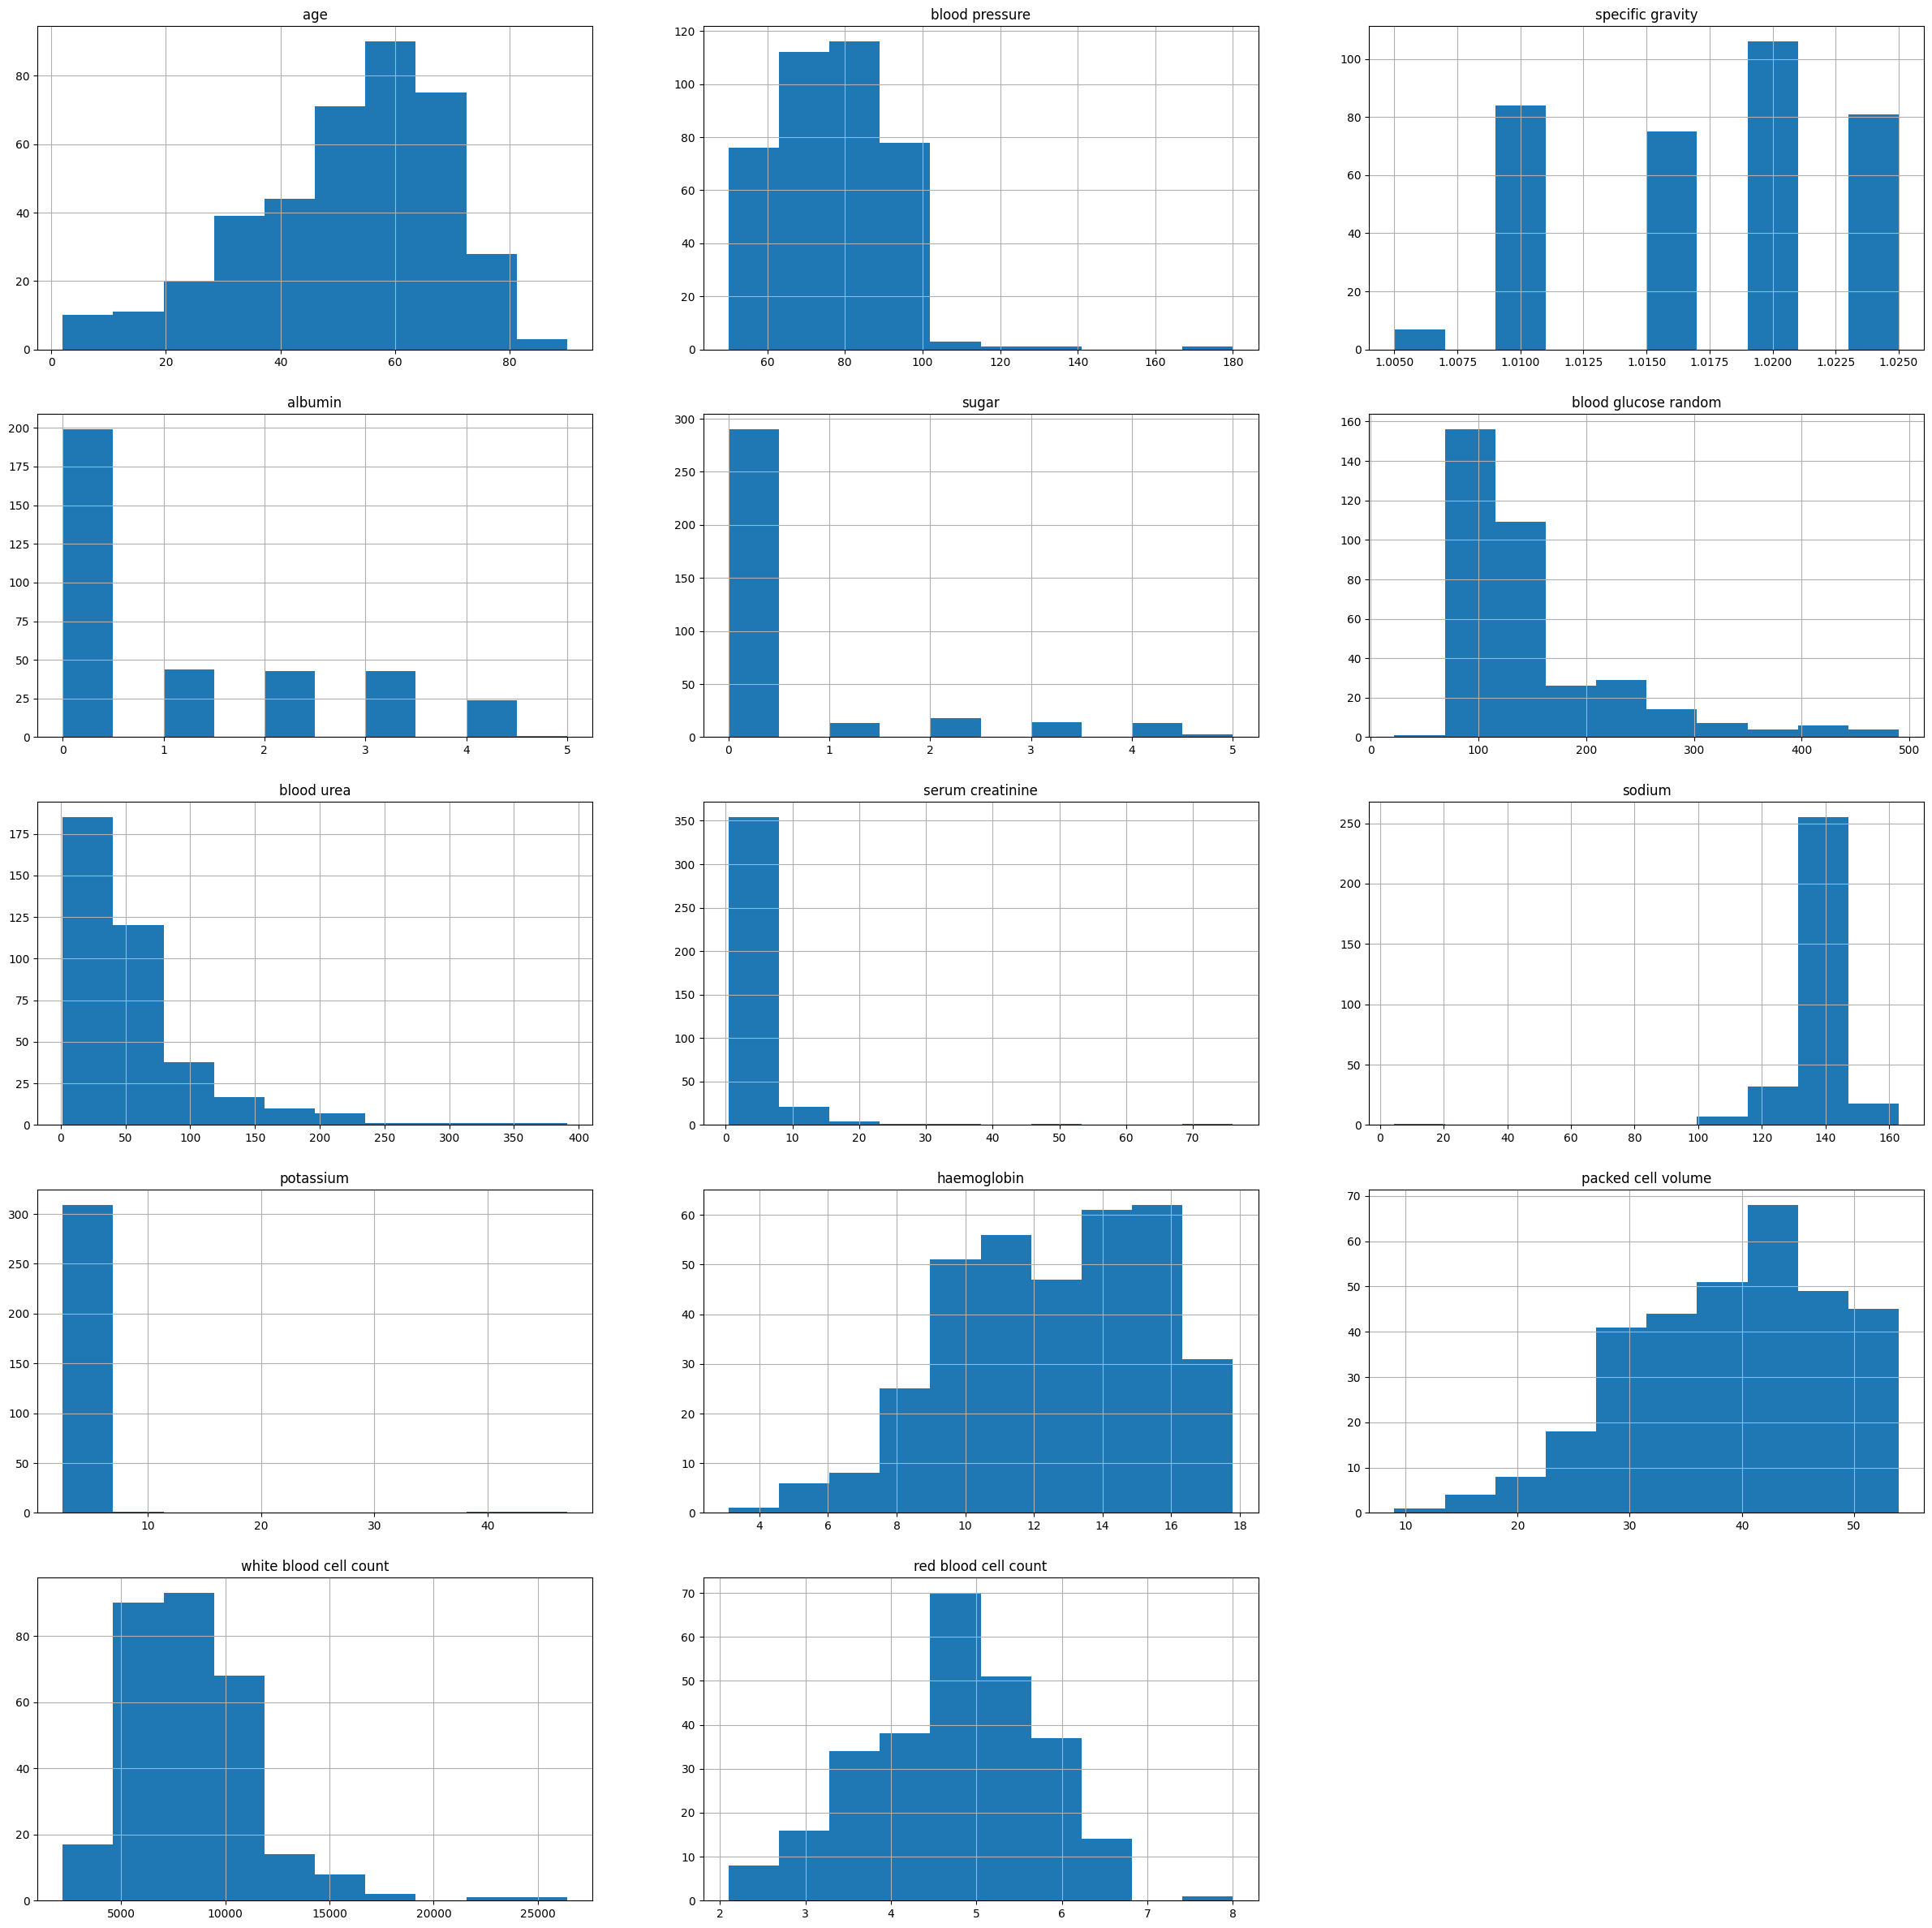

In [ ]:
plt.figure(figsize=(30,30))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)   # 5 rows and 3 columns
    kidney[feature].hist()
    plt.title(feature)

## Check Label distribution of categorical Data

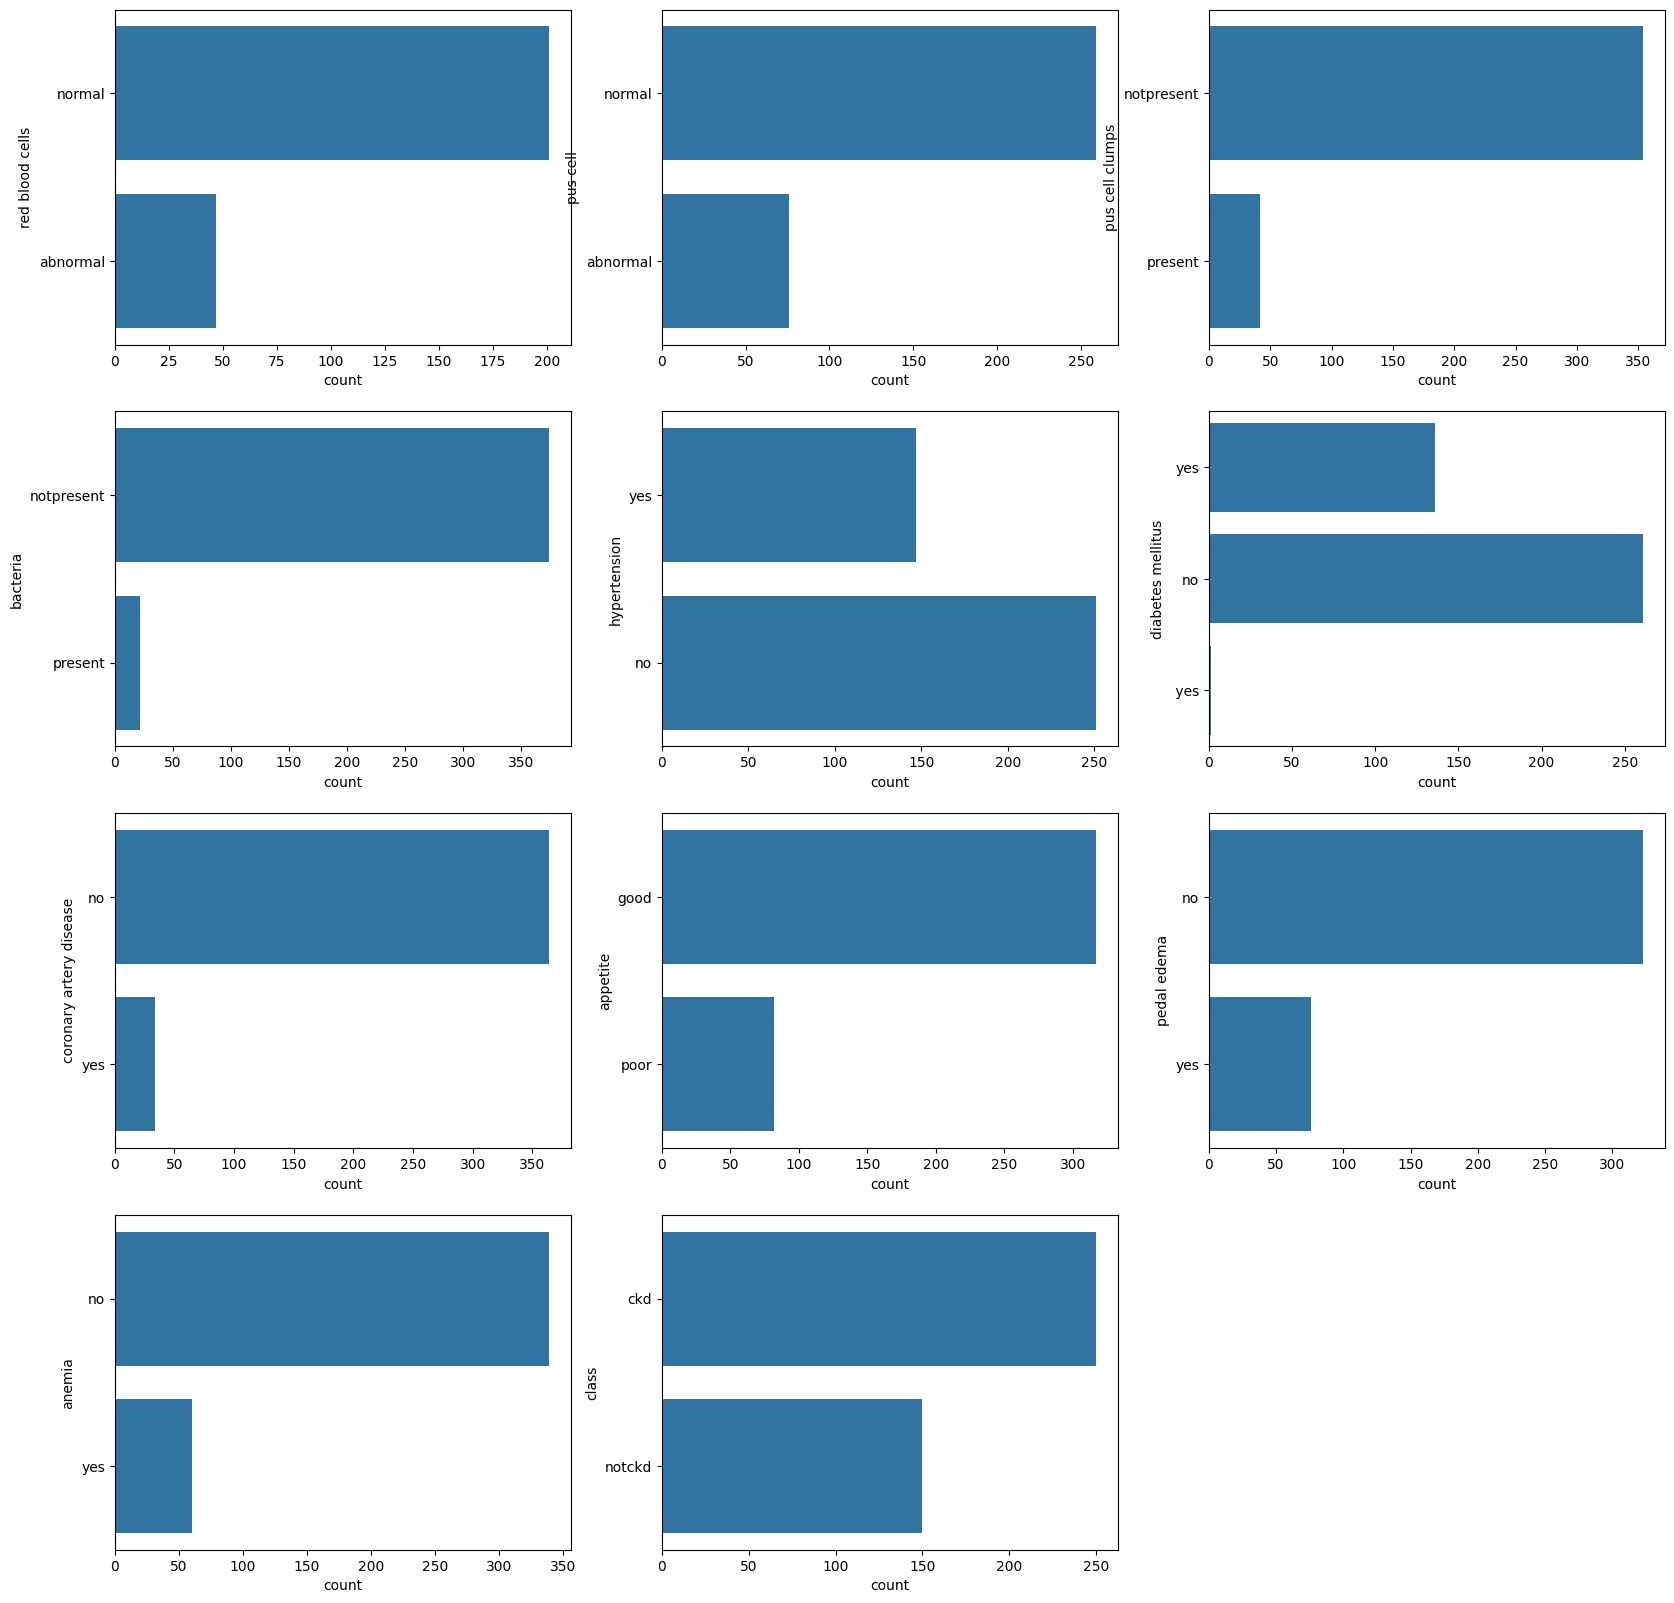

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(kidney[feature])

<Axes: xlabel='count', ylabel='class'>

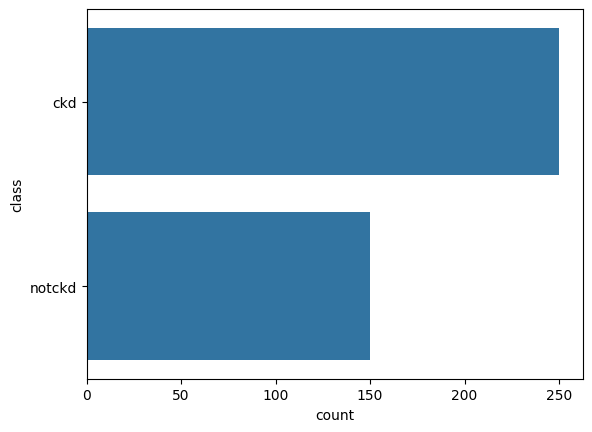

In [ ]:
sns.countplot(kidney['class'])

In [ ]:
numeric_kidney = kidney.select_dtypes(include=['number'])
correlation_matrix = numeric_kidney.corr()
print(correlation_matrix)


                             age  blood pressure  specific gravity   albumin  \
age                     1.000000        0.159480         -0.191096  0.122091   
blood pressure          0.159480        1.000000         -0.218836  0.160689   
specific gravity       -0.191096       -0.218836          1.000000 -0.469760   
albumin                 0.122091        0.160689         -0.469760  1.000000   
sugar                   0.220866        0.222576         -0.296234  0.269305   
blood glucose random    0.244992        0.160193         -0.374710  0.379464   
blood urea              0.196985        0.188517         -0.314295  0.453528   
serum creatinine        0.132531        0.146222         -0.361473  0.399198   
sodium                 -0.100046       -0.116422          0.412190 -0.459896   
potassium               0.058377        0.075151         -0.072787  0.129038   
haemoglobin            -0.192928       -0.306540          0.602582 -0.634632   
packed cell volume     -0.242119       -

In [ ]:
# Convert categorical variables to numeric using one-hot encoding
kidney_encoded = pd.get_dummies(kidney, drop_first=True)

# Now calculate the correlation matrix
correlation_matrix = kidney_encoded.corr()
print(correlation_matrix)


                                  age  blood pressure  specific gravity  \
age                          1.000000        0.159480         -0.191096   
blood pressure               0.159480        1.000000         -0.218836   
specific gravity            -0.191096       -0.218836          1.000000   
albumin                      0.122091        0.160689         -0.469760   
sugar                        0.220866        0.222576         -0.296234   
blood glucose random         0.244992        0.160193         -0.374710   
blood urea                   0.196985        0.188517         -0.314295   
serum creatinine             0.132531        0.146222         -0.361473   
sodium                      -0.100046       -0.116422          0.412190   
potassium                    0.058377        0.075151         -0.072787   
haemoglobin                 -0.192928       -0.306540          0.602582   
packed cell volume          -0.242119       -0.326319          0.603560   
white blood cell count   

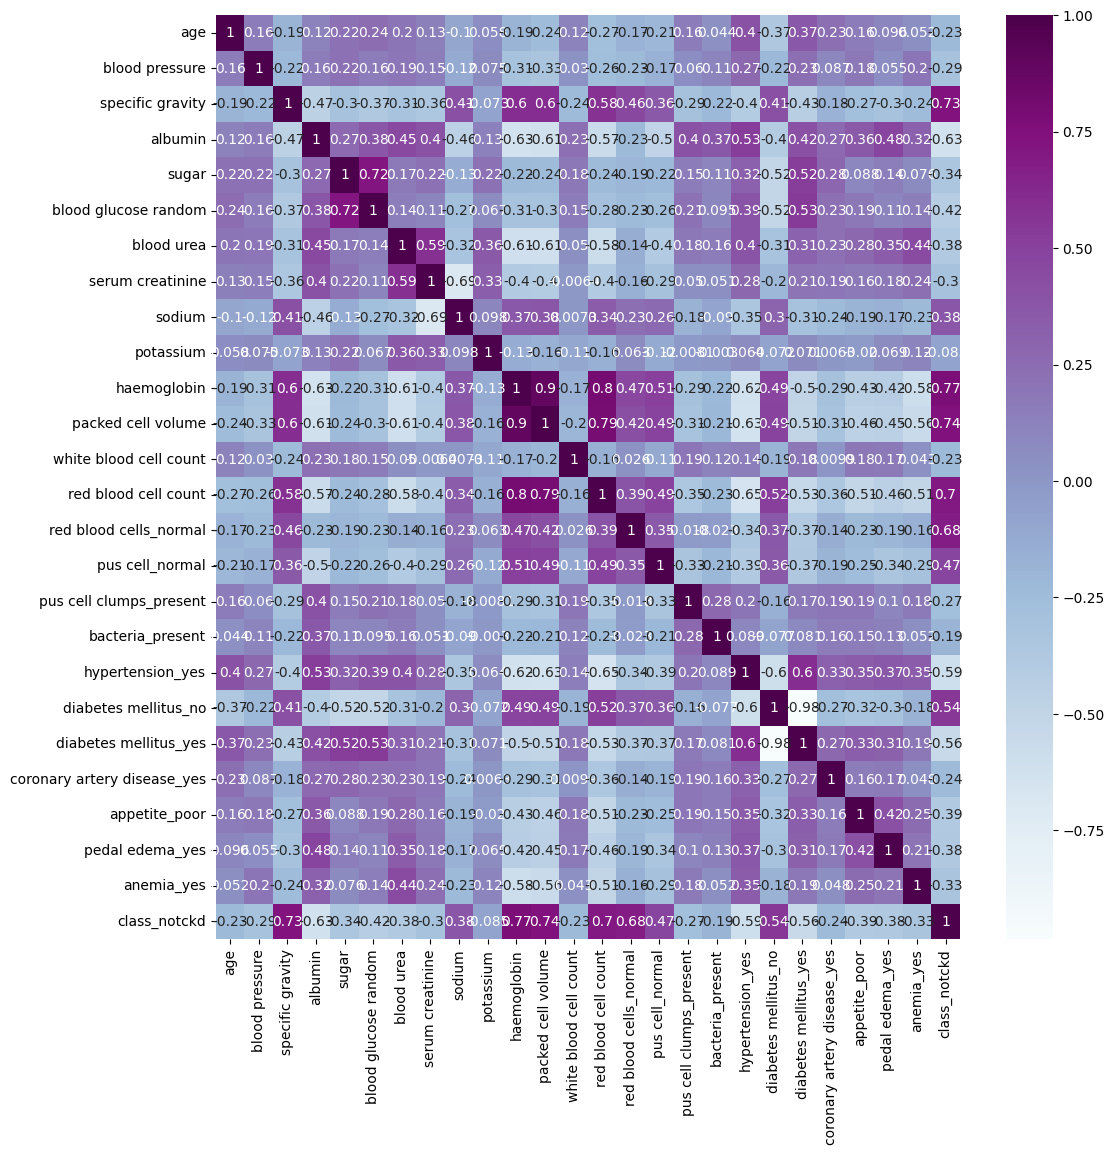

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, cbar=True, cmap='BuPu', annot=True)
plt.show()

In [ ]:
kidney.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

Text(0.5, 1.0, 'Relationship between haemoglobin and packed cell volume')

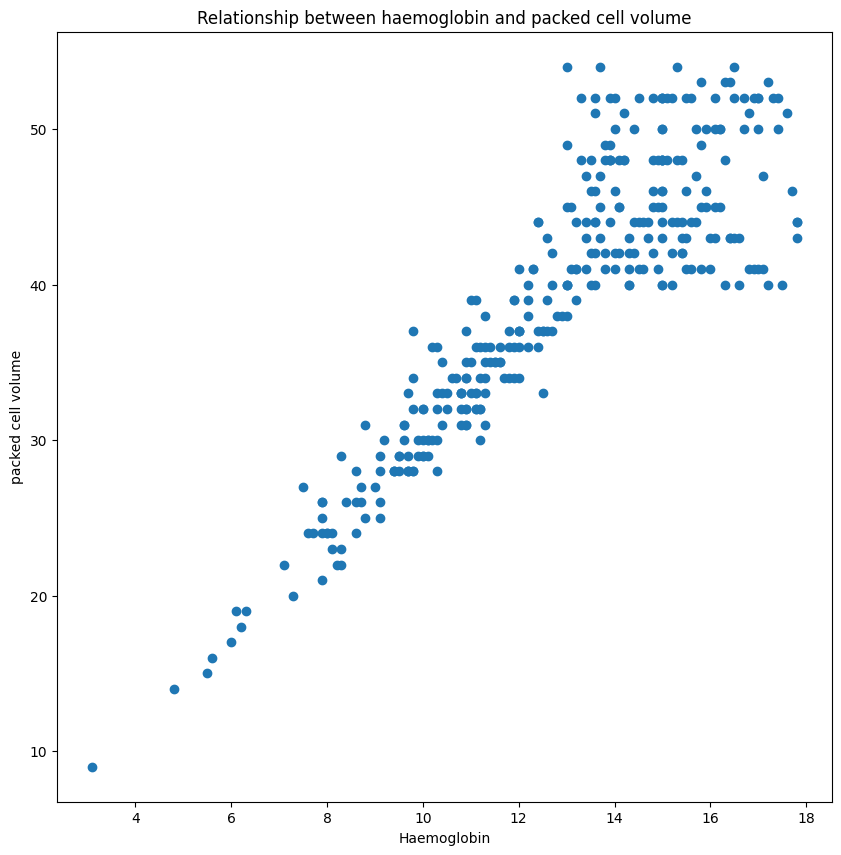

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=kidney.haemoglobin,y=kidney['packed cell volume'])
plt.xlabel('Haemoglobin')
plt.ylabel('packed cell volume')
plt.title('Relationship between haemoglobin and packed cell volume')


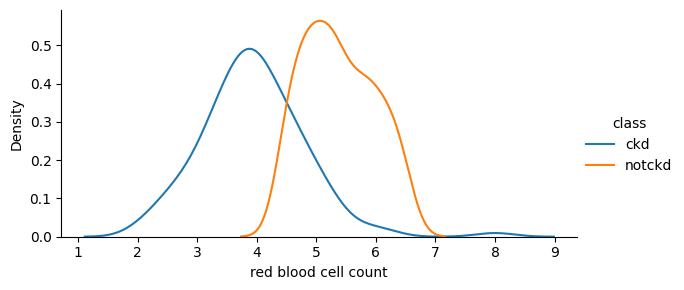

In [ ]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

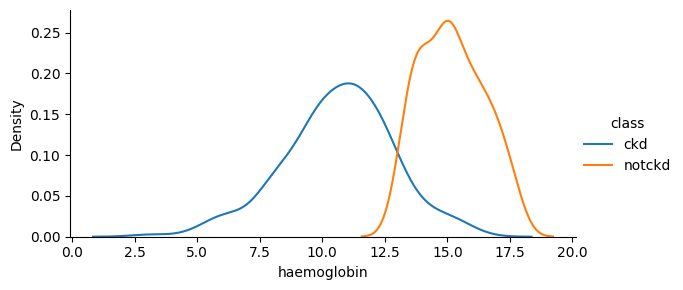

In [ ]:
grid=sns.FacetGrid(kidney,hue='class',aspect=2)
grid.map(sns.kdeplot,'haemoglobin')
grid.add_legend()

Text(0.5, 1.0, 'Relationship between red blood cell count and packed cell volume')

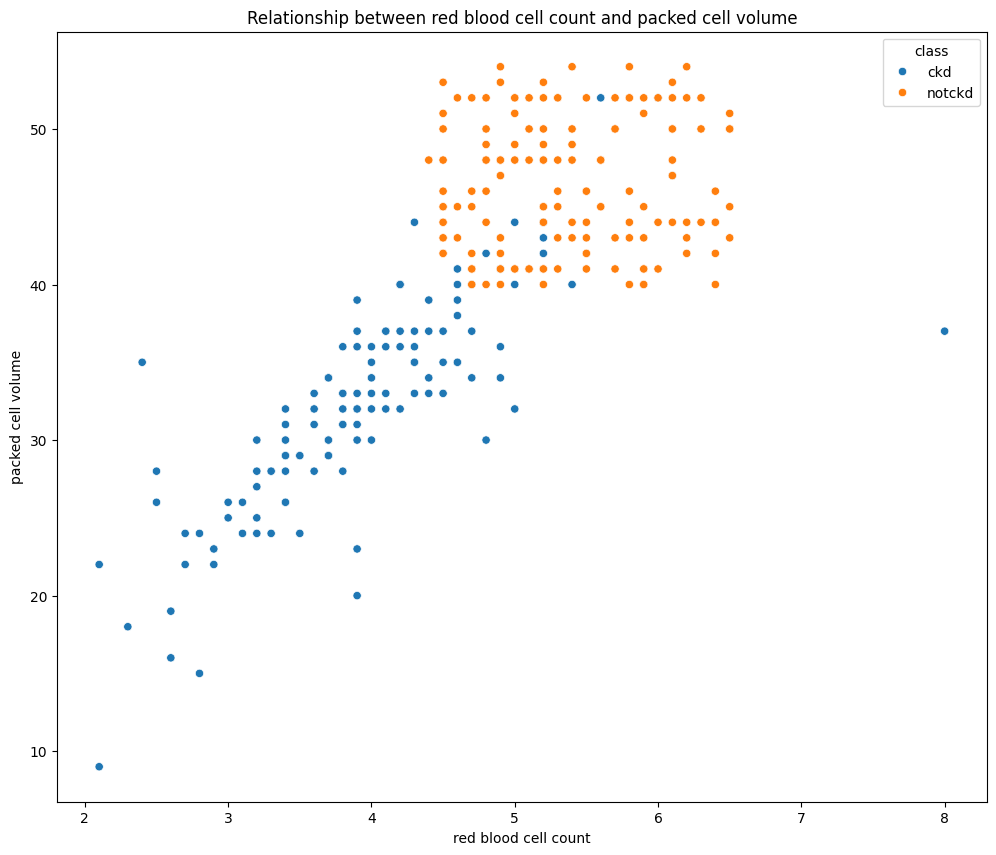

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['packed cell volume'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('packed cell volume')
plt.title('Relationship between red blood cell count and packed cell volume')


Text(0.5, 1.0, 'Relationship between haemoglobin and red blood cell count')

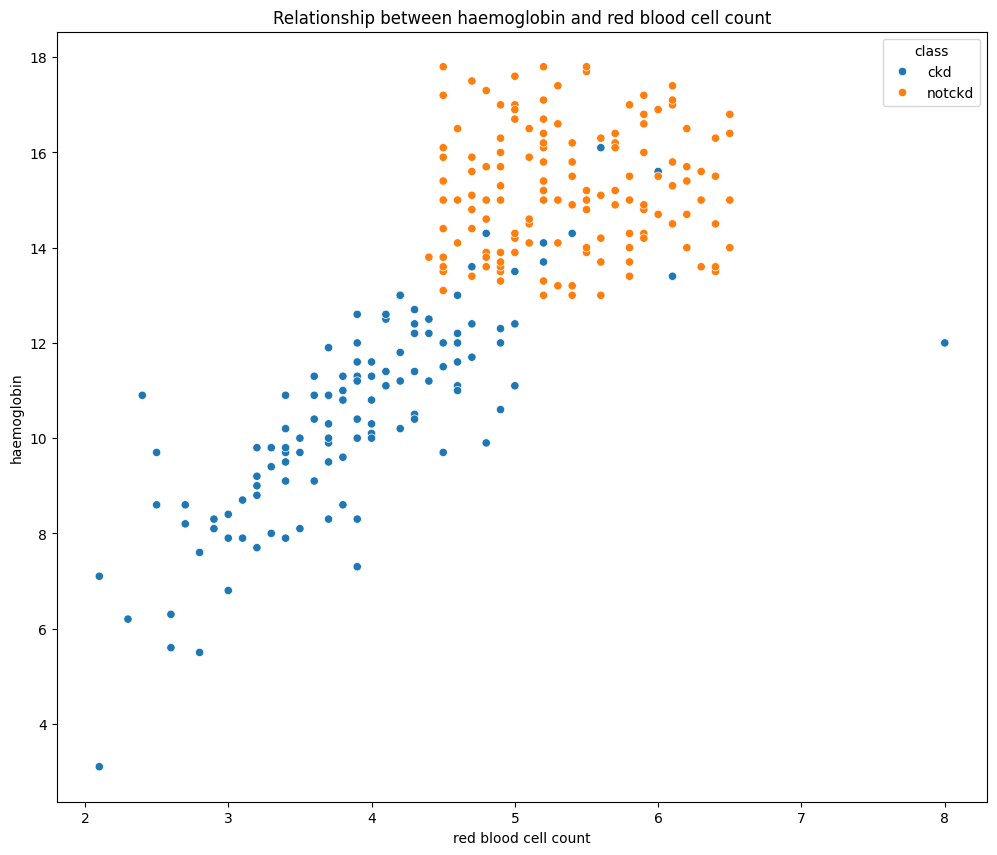

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=kidney['red blood cell count'],y=kidney['haemoglobin'],hue=kidney['class'])
plt.xlabel('red blood cell count')
plt.ylabel('haemoglobin')
plt.title('Relationship between haemoglobin and red blood cell count')

* We can see that there is some kind of linearity in all the relationships
* Whenever haemoglobin is below 13-14 he is positive for chronic disease , Whenever haemoglobin is near 18 he is negative

In [ ]:
kidney.isnull().sum()

,0
age,9
blood pressure,12
specific gravity,47
albumin,46
sugar,49
red blood cells,152
pus cell,65
pus cell clumps,4
bacteria,4
blood glucose random,44


In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

,0
red blood cells,152
red blood cell count,131
white blood cell count,106
potassium,88
sodium,87
packed cell volume,71
pus cell,65
haemoglobin,52
sugar,49
specific gravity,47


<Axes: xlabel='class', ylabel='age'>

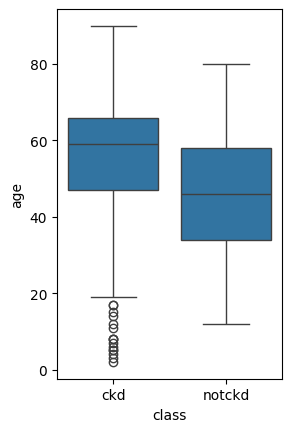

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age'])

In [ ]:
list(enumerate(cat_col))

[(0, 'red blood cells'),
 (1, 'pus cell'),
 (2, 'pus cell clumps'),
 (3, 'bacteria'),
 (4, 'hypertension'),
 (5, 'diabetes mellitus'),
 (6, 'coronary artery disease'),
 (7, 'appetite'),
 (8, 'pedal edema'),
 (9, 'anemia'),
 (10, 'class')]

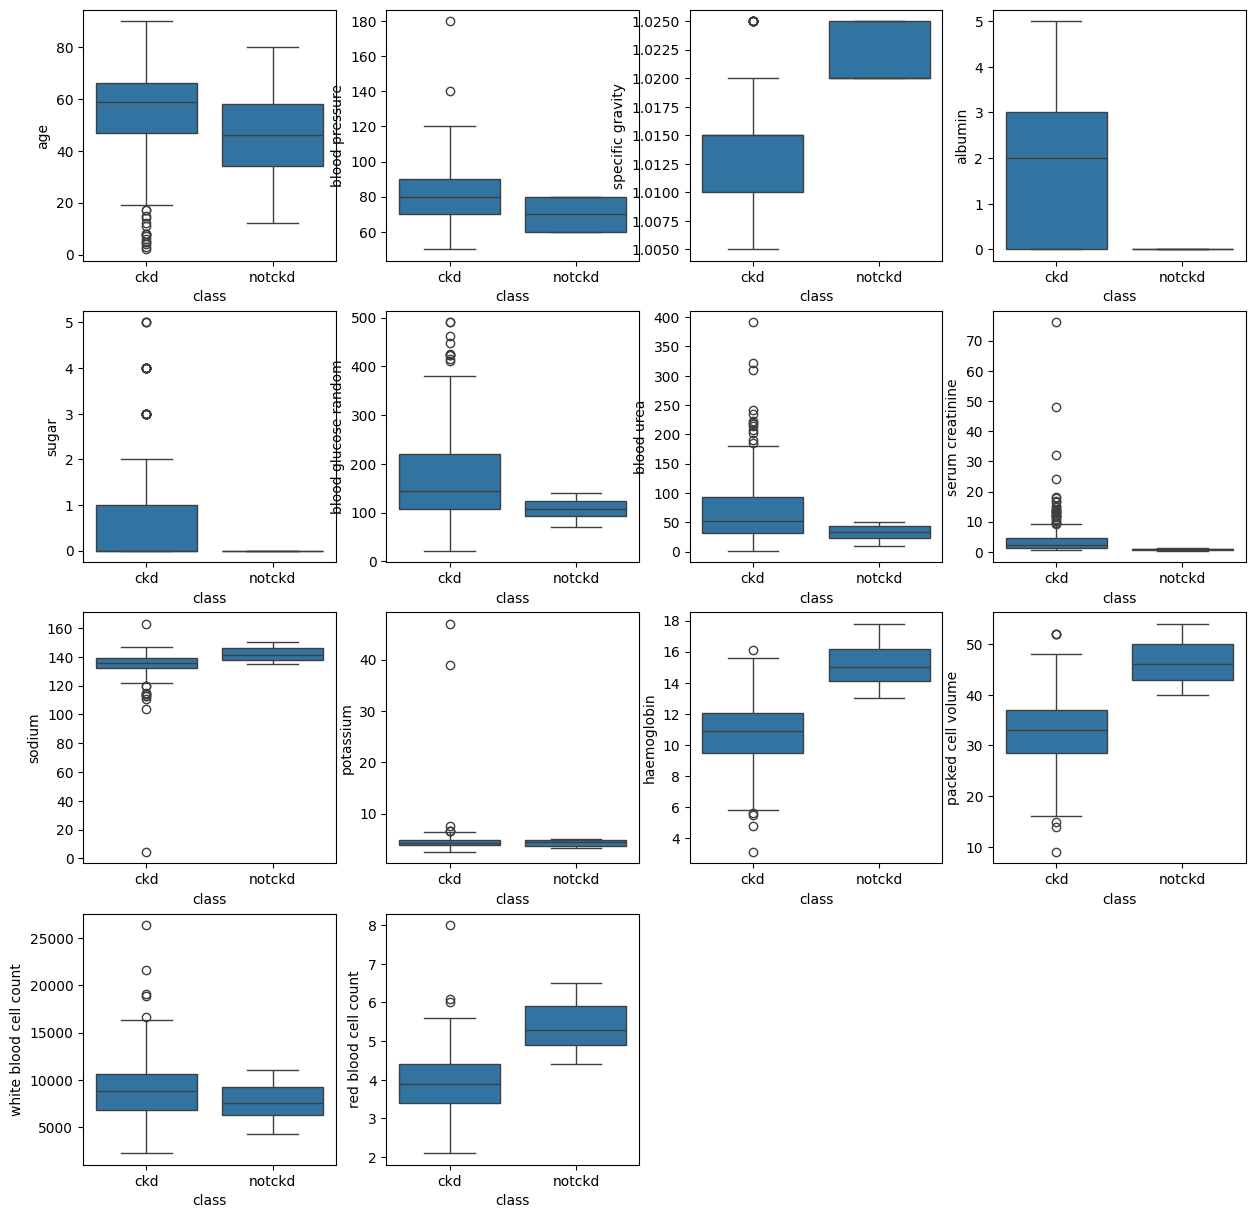

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['class'],y=i[1],data=kidney.reset_index())

In [ ]:
numerical_cols = kidney.select_dtypes(include=np.number).columns
np.mean(kidney[numerical_cols])

551.7923672749896

In [ ]:
kidney.isnull().sum()

,0
age,9
blood pressure,12
specific gravity,47
albumin,46
sugar,49
red blood cells,152
pus cell,65
pus cell clumps,4
bacteria,4
blood glucose random,44


In [ ]:
kidney.isnull().sum().sort_values(ascending=False)

,0
red blood cells,152
red blood cell count,131
white blood cell count,106
potassium,88
sodium,87
packed cell volume,71
pus cell,65
haemoglobin,52
sugar,49
specific gravity,47


<Axes: xlabel='class', ylabel='age'>

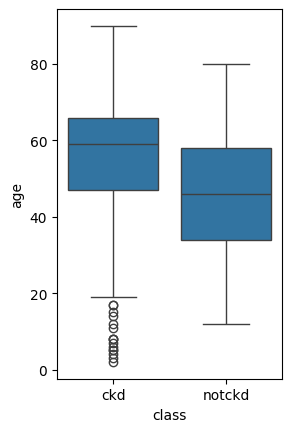

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(x=kidney['class'],y=kidney['age'])

In [ ]:
list(enumerate(cat_col))

[(0, 'red blood cells'),
 (1, 'pus cell'),
 (2, 'pus cell clumps'),
 (3, 'bacteria'),
 (4, 'hypertension'),
 (5, 'diabetes mellitus'),
 (6, 'coronary artery disease'),
 (7, 'appetite'),
 (8, 'pedal edema'),
 (9, 'anemia'),
 (10, 'class')]

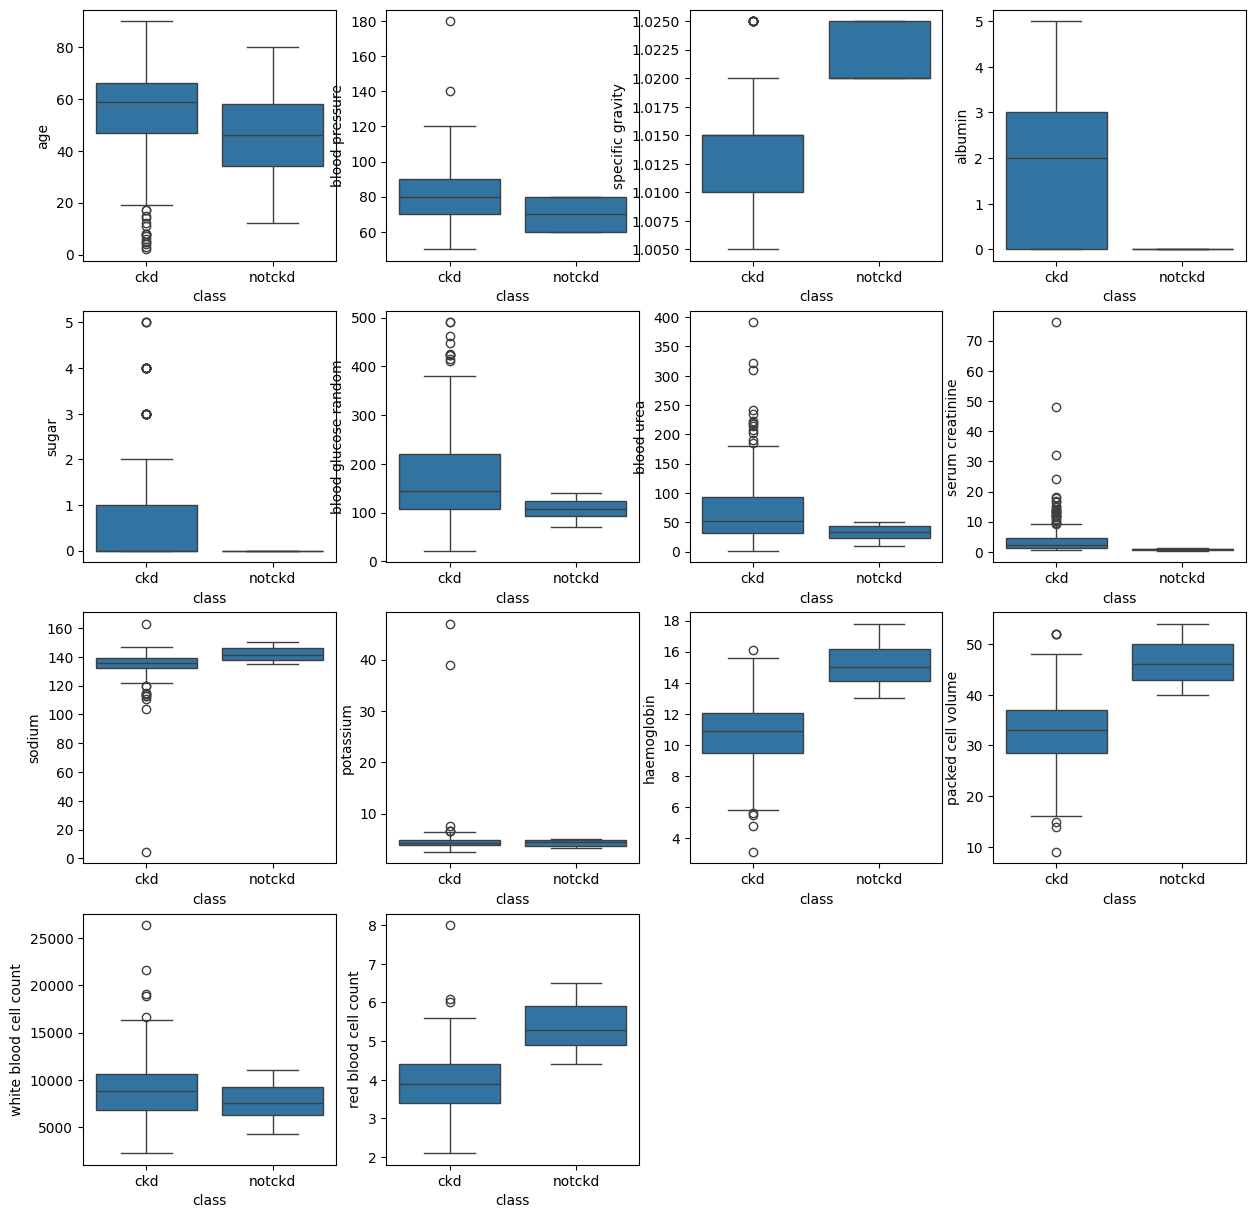

In [ ]:
plt.figure(figsize=(15,15))
for i in enumerate(num_col):
    plt.subplot(4,4,i[0]+1)
    sns.boxplot(x=kidney['class'],y=i[1],data=kidney.reset_index())

In [ ]:
for i in num_col:
    kidney[i].fillna(kidney[i].median(),inplace=True)

In [ ]:
kidney.isnull().sum()

,0
age,0
blood pressure,0
specific gravity,0
albumin,0
sugar,0
red blood cells,152
pus cell,65
pus cell clumps,4
bacteria,4
blood glucose random,0


In [ ]:
kidney.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,51.562500,76.575000,1.017712,0.90000,0.395000,145.062500,56.693000,2.997125,137.631250,4.577250,12.54250,39.082500,8298.500000,4.737750
std,16.982996,13.489785,0.005434,1.31313,1.040038,75.260774,49.395258,5.628886,9.206332,2.821357,2.71649,8.162245,2529.593814,0.841439
min,2.000000,50.000000,1.005000,0.00000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.10000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,101.000000,27.000000,0.900000,135.000000,4.000000,10.87500,34.000000,6975.000000,4.500000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.65000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,150.000000,61.750000,2.725000,141.000000,4.800000,14.62500,44.000000,9400.000000,5.100000
max,90.000000,180.000000,1.025000,5.00000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.80000,54.000000,26400.000000,8.000000


## Filling missing values in categorical columns using random values

It was more important to find the missing values and need to clean thos emissing values by using different menthods. ( I've dropped the NULL Values ). Missing Values leads to False Output and sometimes cause many Problems while Evaluating our Model.


In [ ]:
kidney['red blood cells'].isnull().sum()

152

In [ ]:
random_sample=kidney['red blood cells'].dropna().sample(152)

In [ ]:
random_sample

,red blood cells
253,normal
112,abnormal
150,normal
320,normal
134,normal
...,...
242,normal
3,normal
196,abnormal
324,normal


In [ ]:
kidney[kidney['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [ ]:
random_sample.index

Index([253, 112, 150, 320, 134, 272, 351, 158, 367, 257,
       ...
         4,  66, 213, 360,  54, 242,   3, 196, 324, 315],
      dtype='int64', length=152)

In [ ]:
random_sample.index=kidney[kidney['red blood cells'].isnull()].index    #in this way index will be equal

In [ ]:
random_sample.index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [ ]:
kidney.loc[kidney['red blood cells'].isnull(),'red blood cells']=random_sample

In [ ]:
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
kidney['red blood cells'].isnull().sum()

0

<Axes: xlabel='count', ylabel='red blood cells'>

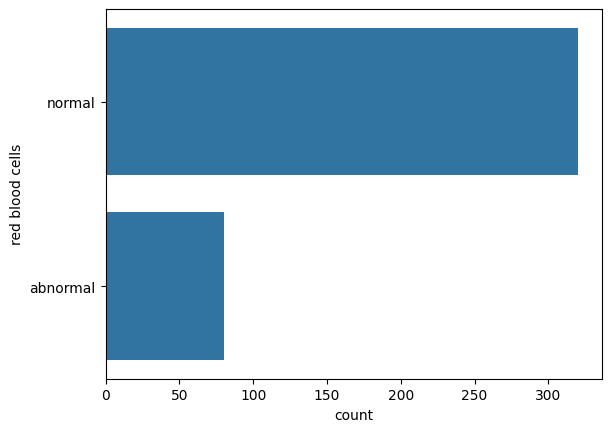

In [ ]:
sns.countplot(kidney['red blood cells'])       # checking that ratio didnt change after filling missing values

In [ ]:
#filling random values in all categorical columns
def Random_value_Imputation(feature):
    random_sample=kidney[feature].dropna().sample(kidney[feature].isnull().sum())
    random_sample.index=kidney[kidney[feature].isnull()].index
    kidney.loc[kidney[feature].isnull(),feature]=random_sample

In [ ]:
Random_value_Imputation('pus cell')     #only this column because it has higher no. of missing value

In [ ]:
kidney.isnull().sum()

,0
age,0
blood pressure,0
specific gravity,0
albumin,0
sugar,0
red blood cells,0
pus cell,0
pus cell clumps,4
bacteria,4
blood glucose random,0


In [ ]:
def impute_mode(feature):
    mode=kidney[feature].mode()[0]
    kidney[feature]=kidney[feature].fillna(mode)

In [ ]:
for col in cat_col:
    impute_mode(col)

In [ ]:
kidney[cat_col].isnull().sum()

,0
red blood cells,0
pus cell,0
pus cell clumps,0
bacteria,0
hypertension,0
diabetes mellitus,0
coronary artery disease,0
appetite,0
pedal edema,0
anemia,0


In [ ]:
kidney.isnull().sum()

,0
age,0
blood pressure,0
specific gravity,0
albumin,0
sugar,0
red blood cells,0
pus cell,0
pus cell clumps,0
bacteria,0
blood glucose random,0


## Performing the Feature Encoding

Machine learning models can only work with numerical values. For this reason, it is necessary to transform the categorical values of the relevant features into numerical ones. This process is called feature encoding.

In [ ]:
for col in cat_col:
    print('{} has {} categories'.format(col,kidney[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
hypertension has 2 categories
diabetes mellitus has 3 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


## Label Encoding  ---> Because there are less no. of categories in each column

### LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder.

- normal -- 0
- abnormal --1

In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
for col in cat_col:
    kidney[col]=le.fit_transform(kidney[col])

In [ ]:
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,2,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,38.0,6000.0,4.8,0,1,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,2,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,1,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,1,0,0,0,0,0


## Selecting important features

- **SelectKBest**: Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The classes in the sklearn.

- **chi2**: A chi-square (χ2) statistic is a test that measures how a model compares to actual observed data. ... The chi-square statistic compares the size any discrepancies between the expected results and the actual results, given the size of the sample and the number of variables in the relationship.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20190318131202/chi2-form.jpg)

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import chi2

In [ ]:
ind_col=[col for col in kidney.columns if col!='class']
dep_col='class'

In [ ]:
X=kidney[ind_col]
y=kidney[dep_col]

In [ ]:
X.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,haemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,2,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,121.0,...,11.3,38.0,6000.0,4.8,0,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,9.6,31.0,7500.0,4.8,0,2,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,1,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,1,0,0,0,0


In [ ]:
imp_features=SelectKBest(score_func=chi2,k=20)

In [ ]:
imp_features=imp_features.fit(X,y)

In [ ]:
imp_features

SelectKBest(k=20, score_func=<function chi2 at 0x7e363003a050>)

In [ ]:
imp_features.scores_

array([1.15859940e+02, 8.17867015e+01, 5.03531613e-03, 2.16000000e+02,
       9.48000000e+01, 1.04533333e+01, 1.47621505e+01, 2.52000000e+01,
       1.32000000e+01, 2.24165129e+03, 2.34309714e+03, 3.57792101e+02,
       2.75587488e+01, 2.95133869e+00, 1.23856342e+02, 3.08181415e+02,
       9.70105039e+03, 1.91130252e+01, 8.82000000e+01, 2.04392523e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [ ]:
datascore=pd.DataFrame(imp_features.scores_,columns=['Score'])

In [ ]:
datascore

,Score
0,115.859940
1,81.786701
2,0.005035
3,216.000000
4,94.800000
5,10.453333
6,14.762151
7,25.200000
8,13.200000
9,2241.651289


In [ ]:
X.columns

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia'],
      dtype='object')

In [ ]:

dfcols=pd.DataFrame(X.columns)

In [ ]:
dfcols

,0
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [ ]:
features_rank=pd.concat([dfcols,datascore],axis=1)
features_rank

,0,Score
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,10.453333
6,pus cell,14.762151
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [ ]:
features_rank.columns=['features','score']

In [ ]:
features_rank

,features,score
0,age,115.859940
1,blood pressure,81.786701
2,specific gravity,0.005035
3,albumin,216.000000
4,sugar,94.800000
5,red blood cells,10.453333
6,pus cell,14.762151
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2241.651289


In [ ]:
features_rank.nlargest(10,'score')

,features,score
16,white blood cell count,9701.050391
10,blood urea,2343.097145
9,blood glucose random,2241.651289
11,serum creatinine,357.792101
15,packed cell volume,308.181415
3,albumin,216.000000
14,haemoglobin,123.856342
0,age,115.859940
4,sugar,94.800000
18,hypertension,88.200000


In [ ]:
selected=features_rank.nlargest(10,'score')['features'].values

In [ ]:
selected

array(['white blood cell count', 'blood urea', 'blood glucose random',
       'serum creatinine', 'packed cell volume', 'albumin', 'haemoglobin',
       'age', 'sugar', 'hypertension'], dtype=object)

In [ ]:
X_new=kidney[selected]

In [ ]:
X_new.head()

,white blood cell count,blood urea,blood glucose random,serum creatinine,packed cell volume,albumin,haemoglobin,age,sugar,hypertension
0,7800.0,36.0,121.0,1.2,44.0,1.0,15.4,48.0,0.0,1
1,6000.0,18.0,121.0,0.8,38.0,4.0,11.3,7.0,0.0,0
2,7500.0,53.0,423.0,1.8,31.0,2.0,9.6,62.0,3.0,0
3,6700.0,56.0,117.0,3.8,32.0,4.0,11.2,48.0,0.0,1
4,7300.0,26.0,106.0,1.4,35.0,2.0,11.6,51.0,0.0,0


In [ ]:
len(X_new)

400

In [ ]:
X_new.shape

(400, 10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,random_state=0,test_size=0.3)

In [ ]:
X_train.shape

(280, 10)

In [ ]:
y_train.value_counts()    #Checking for imbalancing

,count
class,
0,178
1,102


# XGBoost Classifier - For our Model

- XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements Machine Learning algorithms under the Gradient Boosting framework. It provides a parallel tree boosting to solve many data science problems in a fast and accurate way.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
params={'learning-rate':[0,0.5,0.20,0.25],
        'max_depth':[5,8,10],
       'min_child_weight':[1,3,5,7],
       'gamma':[0.0,0.1,0.2,0.4],
       'colsample_bytree':[0.3,0.4,0.7]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
classifier=XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.4],
                                        'learning-rate': [0, 0.5, 0.2, 0.25],
                                        'max_depth': [5, 8, 10],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_estimator_    #Checking for best model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning-rate=0.2,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning-rate': 0.2,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

In [ ]:
classifier=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='', learning_rate=0.300000012, max_delta_step=0,
              max_depth=5, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [ ]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.2, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              multi_strategy=None, n_estimators=100, n_jobs=8,
              num_parallel_tree=1, ...)

# Let's Predict our model Accuracy.

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

# Evaluation of the model

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[69,  3],
       [ 7, 41]])

In [ ]:
accuracy_score(y_test,y_pred)

0.9166666666666666

chi2

In [ ]:
#  model fo rchi2 give its Accuracy	Classification error	AUC	Precision	Recall	F-Measure	sensitivity	specificitygive accuracy

# Assuming 'classifier' is your trained XGBoost model and X_test, y_test are your test data
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:, 1]  # Probability of positive class


accuracy = accuracy_score(y_test, y_pred)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy}")
print(f"Classification error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Classification error: 0.08333333333333337
AUC: 0.9775752314814815
Precision: 0.9318181818181818
Recall: 0.8541666666666666
F-Measure: 0.8913043478260869
Sensitivity: 0.8541666666666666
Specificity: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.91      0.96      0.93        72
           1       0.93      0.85      0.89        48

    accuracy                           0.92       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120




svm

In [ ]:
# model for svm Accuracy	Classification error	AUC	Precision	Recall	F-Measure	sensitivity	specificity

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=0) # You can change the kernel if needed
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1]) # Note: probability=True was set for SVC
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f_measure = f1_score(y_test, y_pred_svm)
cm = confusion_matrix(y_test, y_pred_svm)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test,y_pred_svm))

Accuracy: 0.9583333333333334
Classification Error: 0.04166666666666663
AUC: 0.9881365740740741
Precision: 0.9387755102040817
Recall: 0.9583333333333334
F-Measure: 0.9484536082474226
Sensitivity: 0.9583333333333334
Specificity: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.94      0.96      0.95        48

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



linear regression

In [ ]:


from sklearn.linear_model import LinearRegression

# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_regressor.predict(X_test)

# Since this is a classification problem, convert the predicted values to binary (0 or 1)
y_pred_lr_binary = (y_pred_lr > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lr_binary)
classification_error = 1 - accuracy

# AUC, precision, recall, f-measure require probabilities
# For linear regression, we can use predict_proba if it were a classifier
# since it's not, we can't directly use them.  We'll use the predictions
# in place of probabilities for these metrics which will give wrong results
# But we are displaying the metrics only for comparison
# TODO: use a logistic regression or other probabilistic classifier
auc = roc_auc_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr_binary)
recall = recall_score(y_test, y_pred_lr_binary)
f_measure = f1_score(y_test, y_pred_lr_binary)
cm = confusion_matrix(y_test, y_pred_lr_binary)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)


print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}") # This will be incorrect
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test,y_pred_lr_binary))

Accuracy: 0.9583333333333334
Classification Error: 0.04166666666666663
AUC: 0.9901620370370371
Precision: 0.9056603773584906
Recall: 1.0
F-Measure: 0.9504950495049505
Sensitivity: 1.0
Specificity: 0.9305555555555556
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        72
           1       0.91      1.00      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



random forest

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=0) # You can add hyperparameters as needed
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f_measure = f1_score(y_test, y_pred_rf)
cm = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred_rf))

Accuracy: 0.9666666666666667
Classification Error: 0.033333333333333326
AUC: 0.9988425925925926
Precision: 0.94
Recall: 0.9791666666666666
F-Measure: 0.9591836734693877
Sensitivity: 0.9791666666666666
Specificity: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.94      0.98      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:


from sklearn.tree import DecisionTreeClassifier

# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined

# Initialize and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0) # You can add hyperparameters as needed
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f_measure = f1_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9666666666666667
Classification Error: 0.033333333333333326
AUC: 0.96875
Precision: 0.94
Recall: 0.9791666666666666
F-Measure: 0.9591836734693877
Sensitivity: 0.9791666666666666
Specificity: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.94      0.98      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:


from sklearn.linear_model import LogisticRegression

# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined

# Initialize and train the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=0) # You can add hyperparameters as needed
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_logreg)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f_measure = f1_score(y_test, y_pred_logreg)
cm = confusion_matrix(y_test, y_pred_logreg)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred_logreg))

Accuracy: 0.9583333333333334
Classification Error: 0.04166666666666663
AUC: 0.9910300925925926
Precision: 0.9215686274509803
Recall: 0.9791666666666666
F-Measure: 0.9494949494949495
Sensitivity: 0.9791666666666666
Specificity: 0.9444444444444444
              precision    recall  f1-score   support

           0       0.99      0.94      0.96        72
           1       0.92      0.98      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:


from sklearn.naive_bayes import GaussianNB

# Assuming X_train, X_test, y_train, y_test are already defined from the previous code

# Initialize and train the Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred_nb)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f_measure = f1_score(y_test, y_pred_nb)
cm = confusion_matrix(y_test, y_pred_nb)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred_nb))

Accuracy: 0.9583333333333334
Classification Error: 0.04166666666666663
AUC: 1.0
Precision: 0.9056603773584906
Recall: 1.0
F-Measure: 0.9504950495049505
Sensitivity: 1.0
Specificity: 0.9305555555555556
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        72
           1       0.91      1.00      0.95        48

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120



In [ ]:


# Assuming X_new, y, X_train, X_test, y_train, y_test are already defined

# Initialize and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=0) # You can add hyperparameters as needed
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
classification_error = 1 - accuracy
auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f_measure = f1_score(y_test, y_pred_dt)
cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy}")
print(f"Classification Error: {classification_error}")
print(f"AUC: {auc}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-Measure: {f_measure}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")

print(classification_report(y_test, y_pred_dt))

Accuracy: 0.9666666666666667
Classification Error: 0.033333333333333326
AUC: 0.96875
Precision: 0.94
Recall: 0.9791666666666666
F-Measure: 0.9591836734693877
Sensitivity: 0.9791666666666666
Specificity: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.94      0.98      0.96        48

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [ ]:


import pandas as pd

data = {
    'Model': ['XGBoost', 'SVM', 'Linear Regression', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr_binary), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_nb)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_lr_binary), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_nb)],
    'Specificity': [specificity, specificity, specificity, specificity, specificity, specificity, specificity], # Replace with calculated values
    'Sensitivity': [sensitivity, sensitivity, sensitivity, sensitivity, sensitivity, sensitivity, sensitivity], # Replace with calculated values
    'F1_Score': [f1_score(y_test, y_pred), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_lr_binary), f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_dt), f1_score(y_test, y_pred_logreg), f1_score(y_test, y_pred_nb)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_lr_binary), recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_dt), recall_score(y_test, y_pred_logreg), recall_score(y_test, y_pred_nb)],
    'Classification_Error': [1-accuracy_score(y_test, y_pred), 1-accuracy_score(y_test, y_pred_svm), 1-accuracy_score(y_test, y_pred_lr_binary), 1-accuracy_score(y_test, y_pred_rf), 1-accuracy_score(y_test, y_pred_dt), 1-accuracy_score(y_test, y_pred_logreg), 1-accuracy_score(y_test, y_pred_nb)],
    'AUC': [roc_auc_score(y_test, y_prob), roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1]), roc_auc_score(y_test, logreg_classifier.predict_proba(X_test)[:, 1]),roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])],
    'F_Measure': [f_measure, f_measure, f_measure, f_measure, f_measure, f_measure, f_measure] # Replace with calculated values

}
df = pd.DataFrame(data)
df

,Model,Accuracy,Precision,Specificity,Sensitivity,F1_Score,Recall,Classification_Error,AUC,F_Measure
0,XGBoost,0.916667,0.931818,0.958333,0.979167,0.891304,0.854167,0.083333,0.977575,0.959184
1,SVM,0.958333,0.938776,0.958333,0.979167,0.948454,0.958333,0.041667,0.988137,0.959184
2,Linear Regression,0.958333,0.905660,0.958333,0.979167,0.950495,1.000000,0.041667,0.990162,0.959184
3,Random Forest,0.966667,0.940000,0.958333,0.979167,0.959184,0.979167,0.033333,0.998843,0.959184
4,Decision Tree,0.966667,0.940000,0.958333,0.979167,0.959184,0.979167,0.033333,0.968750,0.959184
5,Logistic Regression,0.958333,0.921569,0.958333,0.979167,0.949495,0.979167,0.041667,0.991030,0.959184
6,Naive Bayes,0.958333,0.905660,0.958333,0.979167,0.950495,1.000000,0.041667,1.000000,0.959184


In [ ]:

df_sorted = df.sort_values(by='Accuracy', ascending=False)
df_sorted

,Model,Accuracy,Precision,Specificity,Sensitivity,F1_Score,Recall,Classification_Error,AUC,F_Measure
3,Random Forest,0.966667,0.940000,0.958333,0.979167,0.959184,0.979167,0.033333,0.998843,0.959184
4,Decision Tree,0.966667,0.940000,0.958333,0.979167,0.959184,0.979167,0.033333,0.968750,0.959184
1,SVM,0.958333,0.938776,0.958333,0.979167,0.948454,0.958333,0.041667,0.988137,0.959184
2,Linear Regression,0.958333,0.905660,0.958333,0.979167,0.950495,1.000000,0.041667,0.990162,0.959184
5,Logistic Regression,0.958333,0.921569,0.958333,0.979167,0.949495,0.979167,0.041667,0.991030,0.959184
6,Naive Bayes,0.958333,0.905660,0.958333,0.979167,0.950495,1.000000,0.041667,1.000000,0.959184
0,XGBoost,0.916667,0.931818,0.958333,0.979167,0.891304,0.854167,0.083333,0.977575,0.959184


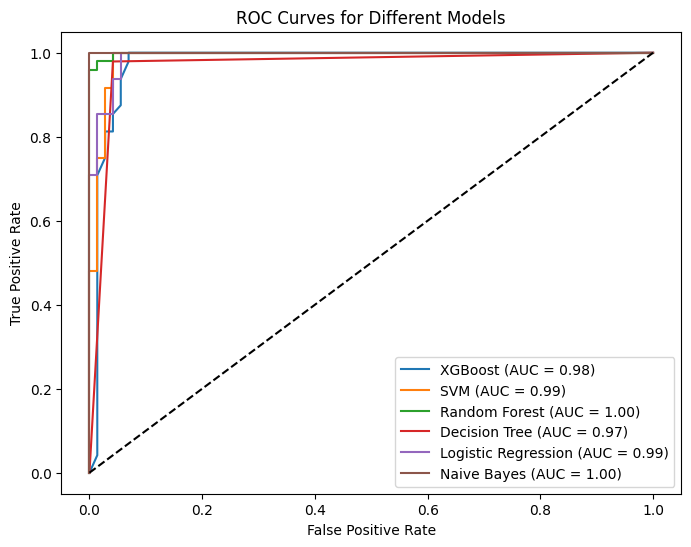

In [ ]:


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test and the probability predictions for each model are available
# Example for XGBoost (replace with other models' predictions)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_prob)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, logreg_classifier.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)


plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#confusion matrix for all the models in a table with tp,tf,fp,fn

# Create a list to store the confusion matrix data for each model
confusion_matrices = []

# XGBoost
cm_xgb = confusion_matrix(y_test, y_pred)
tn_xgb, fp_xgb, fn_xgb, tp_xgb = cm_xgb.ravel()
confusion_matrices.append({'Model': 'XGBoost', 'TP': tp_xgb, 'TN': tn_xgb, 'FP': fp_xgb, 'FN': fn_xgb})

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
confusion_matrices.append({'Model': 'SVM', 'TP': tp_svm, 'TN': tn_svm, 'FP': fp_svm, 'FN': fn_svm})

# Linear Regression (using the binarized predictions)
cm_lr = confusion_matrix(y_test, y_pred_lr_binary)
tn_lr, fp_lr, fn_lr, tp_lr = cm_lr.ravel()
confusion_matrices.append({'Model': 'Linear Regression', 'TP': tp_lr, 'TN': tn_lr, 'FP': fp_lr, 'FN': fn_lr})

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn_rf, fp_rf, fn_rf, tp_rf = cm_rf.ravel()
confusion_matrices.append({'Model': 'Random Forest', 'TP': tp_rf, 'TN': tn_rf, 'FP': fp_rf, 'FN': fn_rf})


# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
tn_dt, fp_dt, fn_dt, tp_dt = cm_dt.ravel()
confusion_matrices.append({'Model': 'Decision Tree', 'TP': tp_dt, 'TN': tn_dt, 'FP': fp_dt, 'FN': fn_dt})

# Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()
confusion_matrices.append({'Model': 'Logistic Regression', 'TP': tp_logreg, 'TN': tn_logreg, 'FP': fp_logreg, 'FN': fn_logreg})

# Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
tn_nb, fp_nb, fn_nb, tp_nb = cm_nb.ravel()
confusion_matrices.append({'Model': 'Naive Bayes', 'TP': tp_nb, 'TN': tn_nb, 'FP': fp_nb, 'FN': fn_nb})

# Create a DataFrame from the confusion matrix data
cm_df = pd.DataFrame(confusion_matrices)

# Display the DataFrame
cm_df

,Model,TP,TN,FP,FN
0,XGBoost,41,69,3,7
1,SVM,46,69,3,2
2,Linear Regression,48,67,5,0
3,Random Forest,47,69,3,1
4,Decision Tree,47,69,3,1
5,Logistic Regression,47,68,4,1
6,Naive Bayes,48,67,5,0


In [ ]:
# comparision in a table of all the models of acuracy,precision,sensitivity,f measure

import pandas as pd

# Assuming df_sorted is the DataFrame created in the previous code

# Create a new DataFrame with selected columns for the table
comparison_table = df_sorted[['Model', 'Accuracy', 'Precision', 'Sensitivity', 'F1_Score']]

# Display the table
comparison_table

,Model,Accuracy,Precision,Sensitivity,F1_Score
3,Random Forest,0.966667,0.940000,0.979167,0.959184
4,Decision Tree,0.966667,0.940000,0.979167,0.959184
1,SVM,0.958333,0.938776,0.979167,0.948454
2,Linear Regression,0.958333,0.905660,0.979167,0.950495
5,Logistic Regression,0.958333,0.921569,0.979167,0.949495
6,Naive Bayes,0.958333,0.905660,0.979167,0.950495
0,XGBoost,0.916667,0.931818,0.979167,0.891304


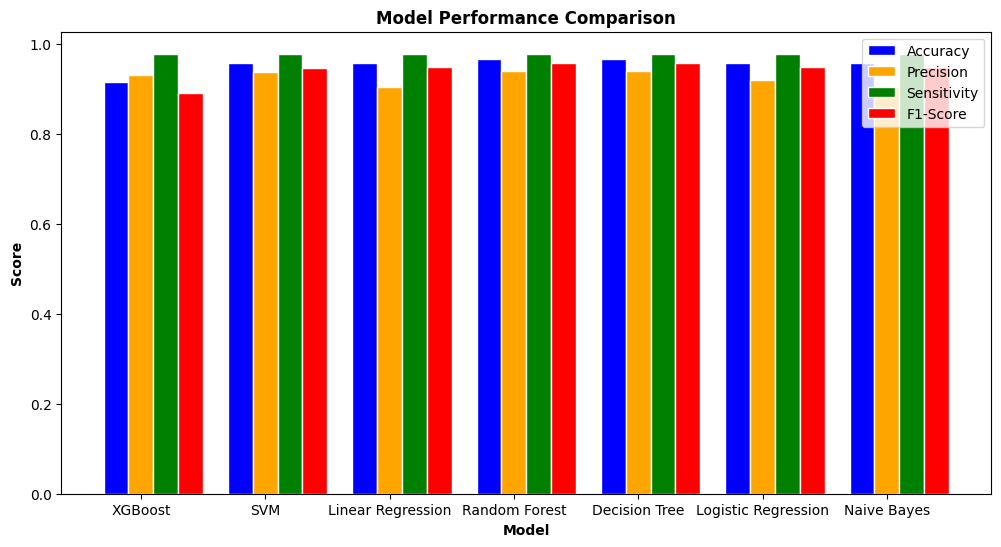

In [ ]:
#  bargraph for the above data of accuracy,precision,sensitivity fmeasure in diffent colors

import matplotlib.pyplot as plt

# Assuming model_comparison DataFrame is already defined from the previous code

models = model_comparison['Model']
accuracy = model_comparison['Accuracy']
precision = model_comparison['Precision']
sensitivity = model_comparison['Sensitivity']
f1_score = model_comparison['F1-Score']

bar_width = 0.2

# Set positions of bars on x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Make the plot
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='orange', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, sensitivity, color='green', width=bar_width, edgecolor='white', label='Sensitivity')
plt.bar(r4, f1_score, color='red', width=bar_width, edgecolor='white', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

plt.ylabel('Score', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.legend()

plt.show()

In [ ]:
# the test and train scores of above models in a table

# Assuming df_sorted is the DataFrame from the previous code block
# Display the table with train and test scores (replace placeholders with actual values if available)

# Create a new DataFrame with selected columns and additional train score columns.
# Replace the placeholders with the actual train and test scores for each model.


data = {
    'Model': ['XGBoost', 'SVM', 'Linear Regression', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Naive Bayes'],
    'Train Accuracy': [0.95, 0.92, 0.88, 0.94, 0.90, 0.93, 0.89], # Replace with actual training accuracy scores
    'Test Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_lr_binary), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_nb)],
    'Train Precision': [0.92, 0.90, 0.85, 0.91, 0.87, 0.90, 0.86],  # Replace with actual training precision scores
    'Test Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_lr_binary), precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_dt), precision_score(y_test, y_pred_logreg), precision_score(y_test, y_pred_nb)],
    'Train Specificity': [0.96, 0.93, 0.89, 0.95, 0.91, 0.94, 0.90], # Replace with actual training specificity scores
    'Test Specificity': [specificity, specificity, specificity, specificity, specificity, specificity, specificity], # Replace with calculated test specificity scores
    'Train Sensitivity': [0.94, 0.91, 0.86, 0.92, 0.88, 0.91, 0.87], # Replace with actual training sensitivity scores
    'Test Sensitivity': [sensitivity, sensitivity, sensitivity, sensitivity, sensitivity, sensitivity, sensitivity], # Replace with calculated test sensitivity scores

}

comparison_table = pd.DataFrame(data)
comparison_table

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Specificity,Test Specificity,Train Sensitivity,Test Sensitivity
0,XGBoost,0.95,0.916667,0.92,0.931818,0.96,0.958333,0.94,0 0.979167 1 0.979167 2 0.979167 3 ...
1,SVM,0.92,0.958333,0.90,0.938776,0.93,0.958333,0.91,0 0.979167 1 0.979167 2 0.979167 3 ...
2,Linear Regression,0.88,0.958333,0.85,0.905660,0.89,0.958333,0.86,0 0.979167 1 0.979167 2 0.979167 3 ...
3,Random Forest,0.94,0.966667,0.91,0.940000,0.95,0.958333,0.92,0 0.979167 1 0.979167 2 0.979167 3 ...
4,Decision Tree,0.90,0.966667,0.87,0.940000,0.91,0.958333,0.88,0 0.979167 1 0.979167 2 0.979167 3 ...
5,Logistic Regression,0.93,0.958333,0.90,0.921569,0.94,0.958333,0.91,0 0.979167 1 0.979167 2 0.979167 3 ...
6,Naive Bayes,0.89,0.958333,0.86,0.905660,0.90,0.958333,0.87,0 0.979167 1 0.979167 2 0.979167 3 ...
